# Multi Plane 2D model
- The solver is in the package "Model_2D_Package"
- Solves for however nk number of k:s
- Currently running nu = 40 (dicretization of control)

In [39]:
%reset -f

import matplotlib.pyplot as plt
from casadi import *

import importlib
import Model_2D_Package.Multi_Plane_2D_solver as model
importlib.reload(model)

<module 'Model_2D_Package.Multi_Plane_2D_solver' from 'C:\\Users\\irmas\\Documents\\TUM\\CaseCourse\\CasADi\\Main\\Model_2D\\Model_2D_Package\\Multi_Plane_2D_solver.py'>

In [47]:
k_values=[1,1.2,1.3,1.4,1.5]
w_opt, J_opt = model.solve_ocp_multi_plane_min_h(k_values)


Total number of variables............................:     1041
                     variables with only lower bounds:        1
                variables with lower and upper bounds:      240
                     variables with only upper bounds:      200
Total number of equality constraints.................:     1005
Total number of inequality constraints...............:      400
        inequality constraints with only lower bounds:      200
   inequality constraints with lower and upper bounds:      200
        inequality constraints with only upper bounds:        0


Number of Iterations....: 182

                                   (scaled)                 (unscaled)
Objective...............:  -2.1958079796416467e+02   -2.1958079796416467e+02
Dual infeasibility......:   9.4462481393217232e-10    9.4462481393217232e-10
Constraint violation....:   5.4569682106375694e-11    5.4569682106375694e-11
Variable bound violation:   9.8882303456448994e-09    9.8882303456448994e-09
Complementar

Optimal cost J* = [219.58079796]
276.39600008943034


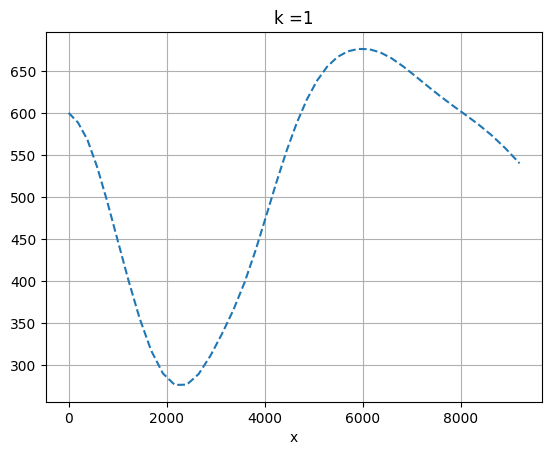

253.7074129171092


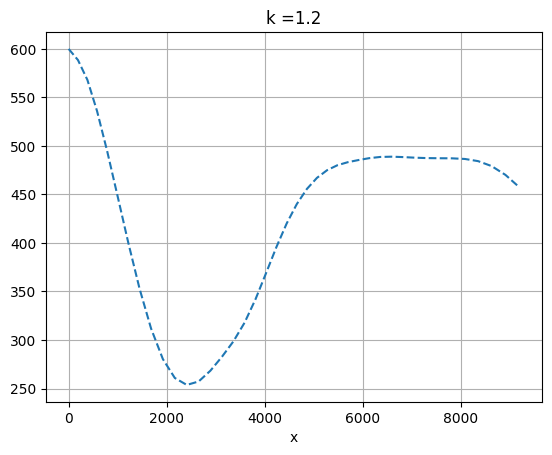

243.67040285677905


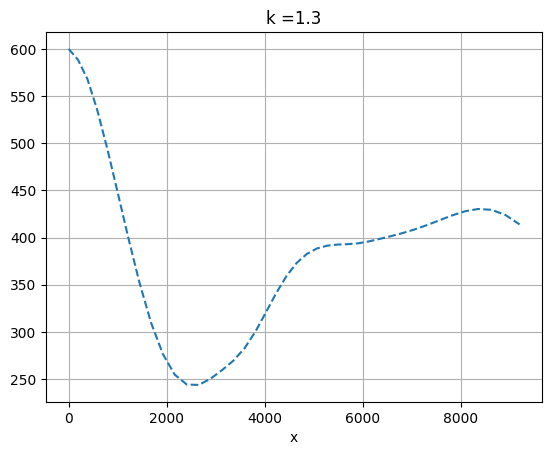

231.6710495704287


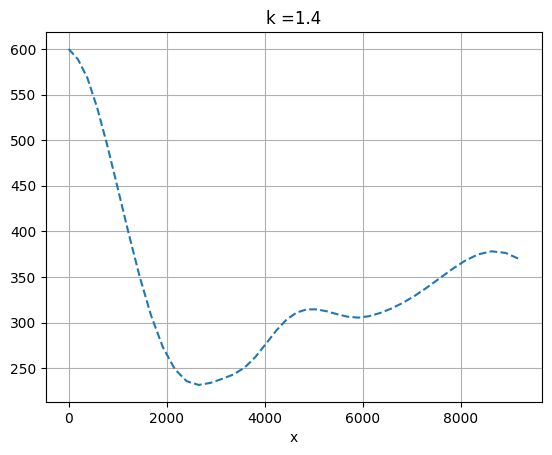

219.5807979593197


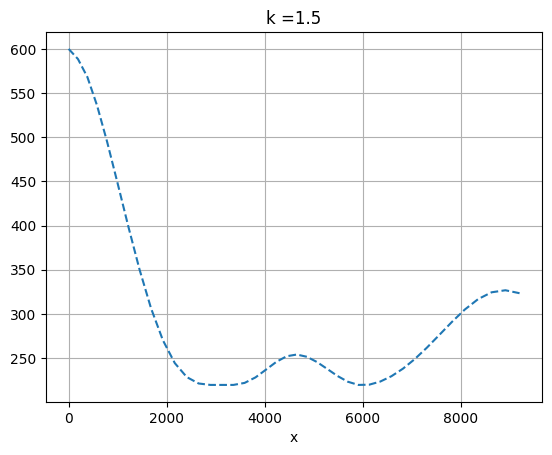

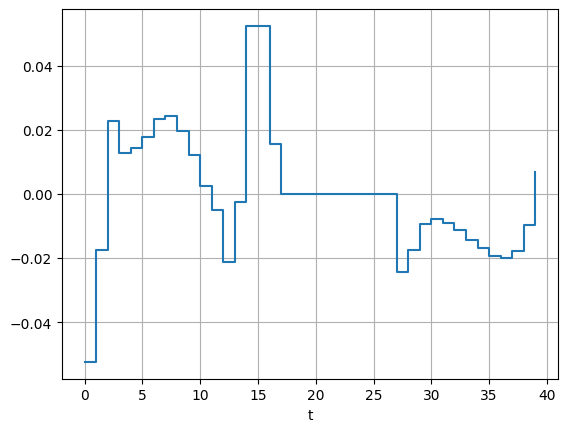

In [53]:
N = model.params.nu
tf = model.params.tf
nk = len(k_values)

u_opt = w_opt[:N]
h_min = w_opt[N]
w = w_opt[N+1:]

all_lists = []
for i in range(nk):
    new_w = w[:N*5+5]
    all_lists.append(new_w)
    w = w[N*5+5:]
    

# plot
tgrid = [tf/N*k for k in range(N+1)]
print("Optimal cost J* =", -J_opt)
for i in range(nk):
    x1_opt = all_lists[0][0::5]
    x2_opt = all_lists[i][1::5]
    x3_opt = all_lists[i][2::5]
    x4_opt = all_lists[i][3::5]
    x5_opt = all_lists[i][4::5] 
    print(min(x2_opt))
    plt.figure(i)
    plt.clf()
    plt.plot(x1_opt, x2_opt, '--')
    plt.xlabel('x')
    plt.grid()
    plt.title('k =' + str(k_values[i]))
    plt.show()


plt.figure(nk+1)
plt.clf()
plt.step(tgrid[:-1], u_opt, where='post')
plt.xlabel('t')
plt.grid()
plt.show()
